<h1>Lesson 4. Model selection: Car mileage</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png/320px-%22real_time_display%22_of_mileage_%28%22mpg%22%29_on_Honda_Insight.png" style="height:200px;">
  
<p>In this exercise you will predict car mileage based on its properties. The data is taken from <a href="http://www-bcf.usc.edu/~gareth/ISL/">ISLR website</a>, but requires few transformations to make it usable for model building. These transformations will include: missing value imputation and normalizing the variables. </p>

<p>This dataset contains 392 car entries with following features:</p>
<ul>
<li>mpg miles per gallon (what we are trying to predict)</li>
<li>cylinders Number of cylinders between 4 and 8</li>
<li>displacement Engine displacement (cu. inches)</li>
<li>horsepower Engine horsepower</li>
<li>weight Vehicle weight (lbs.)</li>
<li>acceleration Time to accelerate from 0 to 60 mph (sec.)</li>
<li>year Model year (modulo 100)</li>
<li>origin Origin of car (1. American, 2. European, 3. Japanese)</li>
<li>name Vehicle name</ul>
</ul>


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
chevrolet chevelle malibu 1,18,8,307,130,3504,12.0,70,1
buick skylark 320 2,15,8,350,165,3693,11.5,70,1
plymouth satellite 3,18,8,318,150,3436,11.0,70,1
amc rebel sst 4,16,8,304,150,3433,12.0,70,1
ford torino 5,17,8,302,140,3449,10.5,70,1
ford galaxie 500 6,15,8,429,198,4341,10.0,70,1


'data.frame':	397 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...


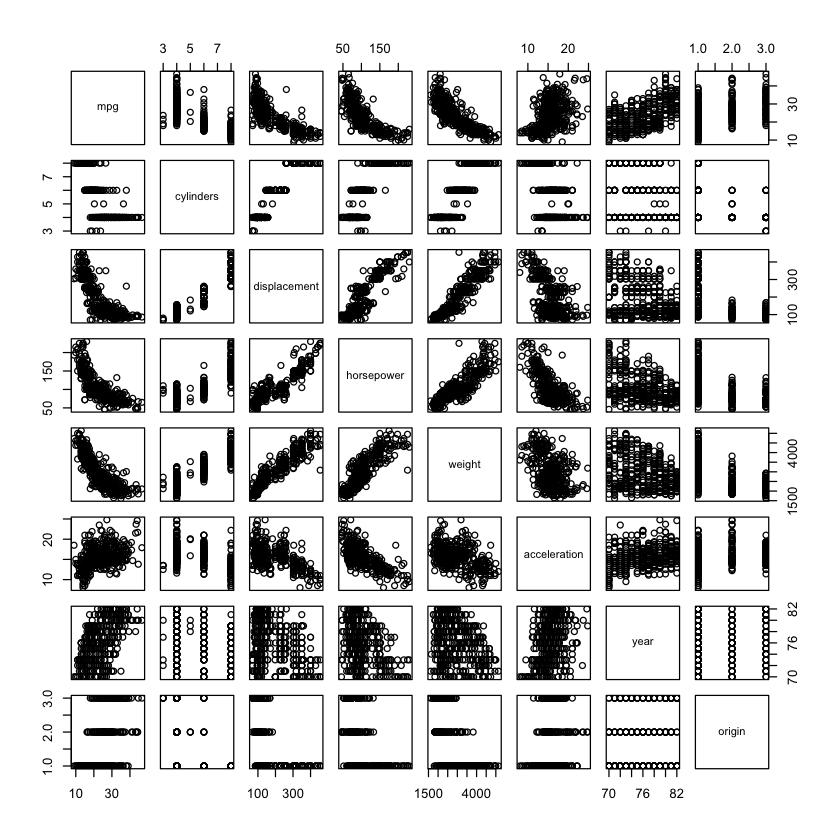

In [1]:
# Load the data
auto_url = "http://www-bcf.usc.edu/~gareth/ISL/Auto.csv"
auto = read.csv(auto_url, na.strings="?")
# Note that you can also obtain the data from ISLR package:
# library(help = ISLR)
# We will name the rows using the 'name' column. 
# However, assigning the column to rows, will throw an error, because they are not unique.
#
# Let's make them unique by combining it with the row number:
row.names(auto) = paste(auto$name, 1:nrow(auto))
# After this operation, you can delete the name from our dataset:
auto$name <- NULL

head(auto)
str(auto)
plot(auto)

<h3>Q.1. Write a command that will calculate the number of missing values in this dataset</h3>

In [2]:
# Command(s)
sum(is.na(auto)) #so - we have missing values
colSums(is.na(auto)) 


[1] 5

mpg    cylinders displacement   horsepower       weight acceleration 
           0            0            0            5            0            0 
        year       origin 
           0            0

<h3>Q.2. Write a command that will only show the rows with missing values. Can you comment on why the values might be missing (e.g. excessive prevalence of specific feature)?</h3>

In [3]:
# Command:
NArows <- which(rowSums(is.na(auto)) == 1)
auto[NArows,]
# Comment (One - two sentence)
# First, I don't see anomalies in other values - I it's not likely
# there's a specific purpose of data to be missing. 
# Secondly, there's prevalence of American cars (which may mean nothing),
# but missing data does not look like completely random as well.
# So, most likely data is missing at random. Why they may be missing - may be 
# one of dillership had some software failure and did not provide information.

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
ford pinto 33,25.0,4,98,NA,2046,19.0,71,1
ford maverick 127,21.0,6,200,NA,2875,17.0,74,1
renault lecar deluxe 331,40.9,4,85,NA,1835,17.3,80,2
ford mustang cobra 337,23.6,4,140,NA,2905,14.3,80,1
renault 18i 355,34.5,4,100,NA,2320,15.8,81,2


<h3>Q.3. Impute the missing values using median for the column. Given answer to Q.2, is this a good approach to fix the missing value problem?</h3>

In [4]:
# Command(s):
auto[NArows,"horsepower"] <- summary(auto$horsepower)["Median"]
# Comment (one sentence):
# any single imputation (and using best guess  - median) here 
# as well leads to inaccuracy in calculation of standart error.
# That potentially may affect overall model accuracy. 
# Also, it's biased for MCAR, and also biased for MAR (which I think
# is the case here). 
auto[NArows,]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
ford pinto 33,25.0,4,98,93.5,2046,19.0,71,1
ford maverick 127,21.0,6,200,93.5,2875,17.0,74,1
renault lecar deluxe 331,40.9,4,85,93.5,1835,17.3,80,2
ford mustang cobra 337,23.6,4,140,93.5,2905,14.3,80,1
renault 18i 355,34.5,4,100,93.5,2320,15.8,81,2


<h3>Q.4. Create the contrast variables (origin.American, origin.European) for the origin of the car. Remove the numerical 'origin' column from the data.frame. Why didn't we create a variable for 'origin.Japanese'?</h3>

In [5]:
# Commands
americanCars <- which(auto$origin == 1)
europeanCars <- which(auto$origin == 2)
japaneseCars <- which(auto$origin == 3)

auto[americanCars,"origin.American"] <- 1
auto[americanCars,"origin.European"] <- 0
auto[europeanCars,"origin.American"] <- 0
auto[europeanCars,"origin.European"] <- 1
auto[japaneseCars,"origin.American"] <- 0
auto[japaneseCars,"origin.European"] <- 0
# Remove the origin
auto$origin <- NULL
# Comment on why there is no variable for 'origin.Japenese'?
# Because origin.Japanes may be expressed via rest two columns.
# In other words, there's a potential for linear dependency that 
# may affect model performance.

<h3>Q.5. Develop a model that predicts mpg using all the available features in the data.frame. Summarize it and comment on its quality. </h3>


Call:
lm(formula = mpg ~ ., data = auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9229 -2.0778 -0.0884  1.9425 13.3373 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -16.438307   4.627592  -3.552 0.000429 ***
cylinders        -0.450175   0.319805  -1.408 0.160033    
displacement      0.023835   0.007632   3.123 0.001924 ** 
horsepower       -0.012995   0.013406  -0.969 0.332967    
weight           -0.006943   0.000644 -10.781  < 2e-16 ***
acceleration      0.107179   0.096651   1.109 0.268147    
year              0.787844   0.051120  15.412  < 2e-16 ***
origin.American  -2.807050   0.547333  -5.129 4.62e-07 ***
origin.European  -0.052948   0.558932  -0.095 0.924578    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.306 on 388 degrees of freedom
Multiple R-squared:  0.8252,	Adjusted R-squared:  0.8216 
F-statistic: 228.9 on 8 and 388 DF,  p-value: < 2.2e-16


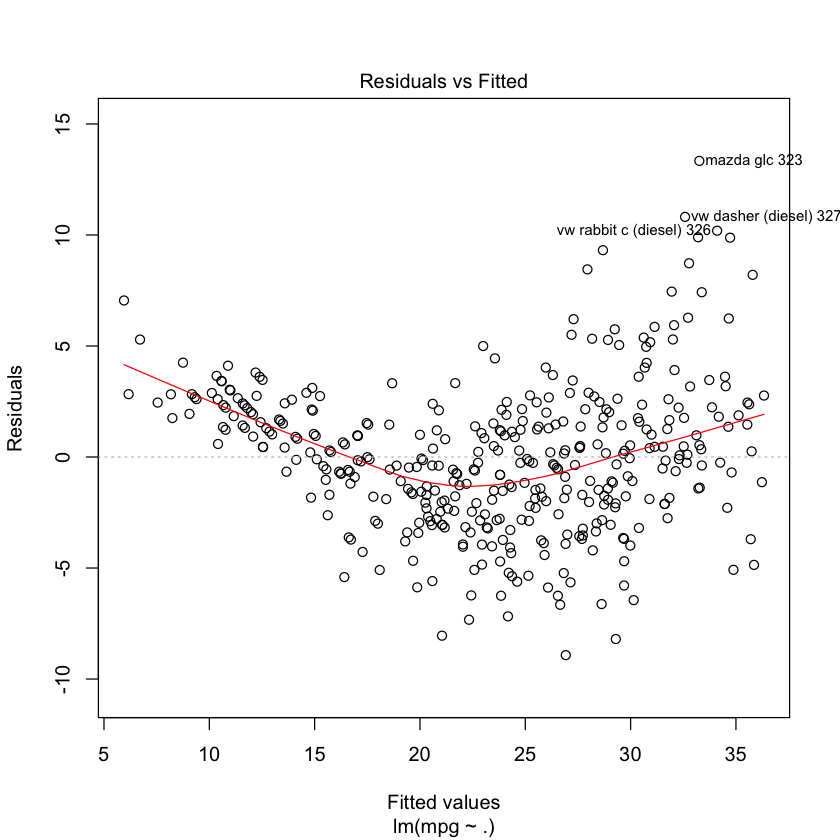

In [6]:
# Develop the model 
linReg <- lm(mpg~., data=auto)
summary(linReg)
plot(linReg, which=1)
# Comment on its quality (one sentence)
# 1. R2 is high enough which means we explained data OK
# 2. Obviously data is not linear so introduction of 
# non-linearity may improve the model (but sorry, I looked 
# for further question and it feels like it's not what you're
# expecting, but I will try in Titanic I promise!)
# 3. There're some non statistically significant data. I 
# would get rid of origin.European at least and would look 
# closer into horsepower (may it needs to be combined with
# something else)

<h3>Q.6. Show histogram of engine displacement to reveal its non-normal distribution. Calculate optimal 'lambda' value for this feature and apply it to displacement to create 'displacement.boxcox' feature. Plot this new feature to see whether it is normally distributed.</h3>


The downloaded binary packages are in
	/var/folders/nh/xb1bcf2s1fdfy5lxpp1g29bm0000gn/T//RtmpUJwOdN/downloaded_packages


[1] -0.6097309

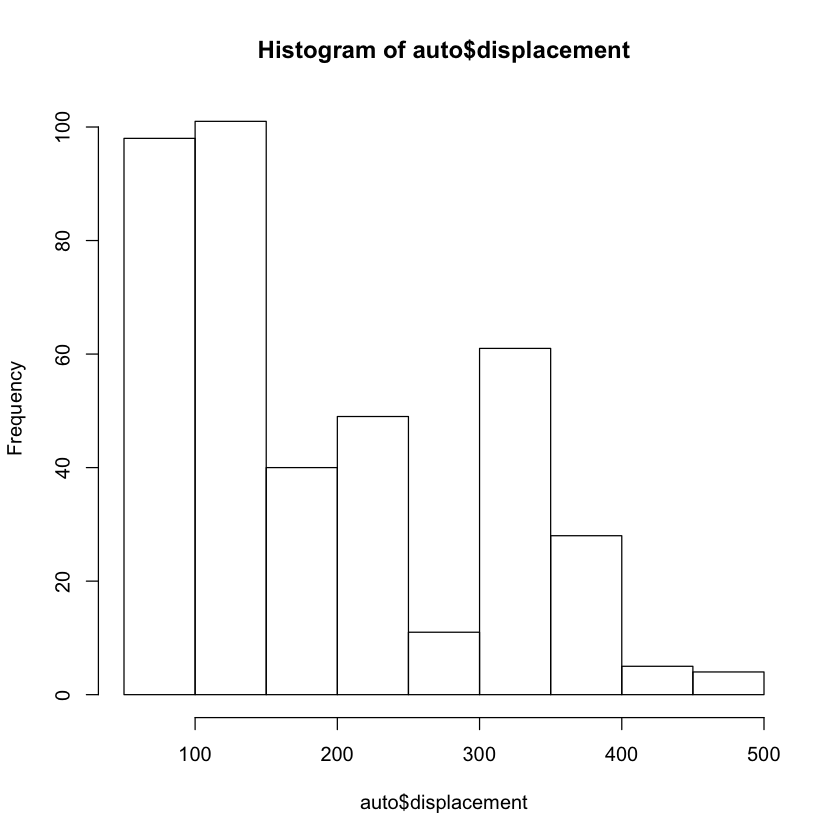

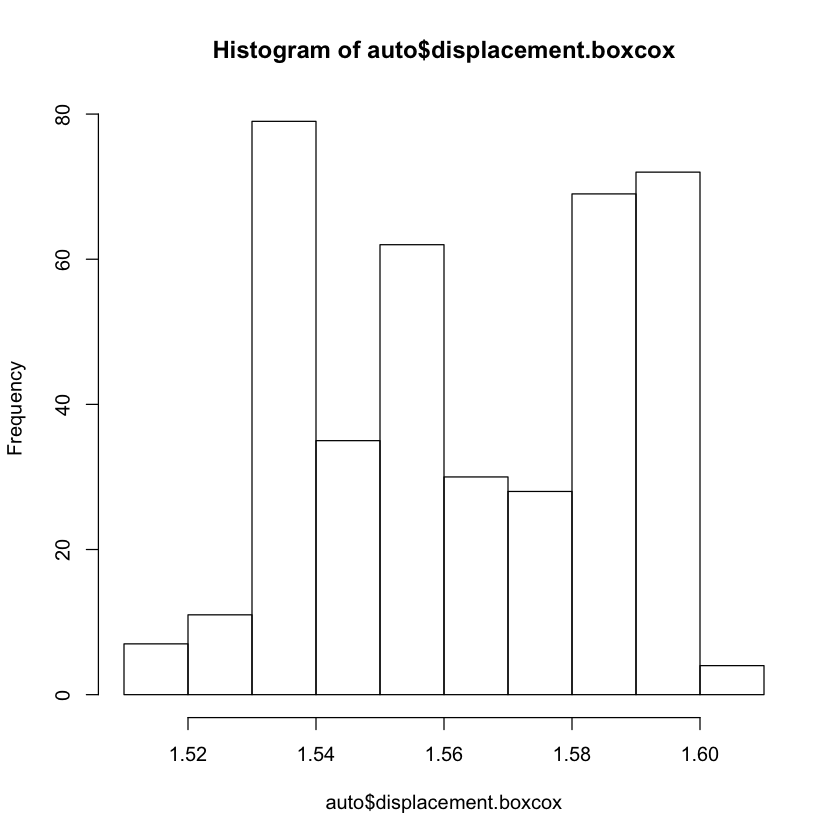

In [11]:
# Histogram of engine displacement
hist(auto$displacement)
# Calculate optimal 'lambda'
install.packages("forecast")
library(forecast)
lambda = BoxCox.lambda( auto$displacement )
lambda 
# I also tried to calculate confidence interval for lambda
# by hands outside of jupyter.
# tmp <- exp(rnorm(10))
# out <- boxcox(lm(tmp~1))
# range(out$x[out$y > max(out$y)-qchisq(0.95,1)/2])
# range was huge! [1] -0.6262626  0.8686869
# so I'm using pre-existing package :) 

# Create 'displacement.boxcox'
auto$displacement.boxcox <- BoxCox( auto$displacement, lambda)

# Plot histogram of this new feature to reveal normal-like distribution
hist(auto$displacement.boxcox)
auto$displacement <- NULL
# It does not look normal to me honestly. Still box-cox is just one of 
# possible transformations and it seems not best for this case. 
# (But better than original). Looks more normal-like except two spikes 
# but it's hard to get rid of spikes witch was presented in original historgam
# as well.

<h3>Q.7. Recalculate the model to predict mpg with the new feature and comment on its performance in comparison to the original model.</h3>

In [14]:
# Calculate then new model
linRegNew <- lm(mpg~., data=auto)
summary(linRegNew)
# Comment on its performance
# R2 here is higher than in previous model (not significatly though).
# And still I don't like acceleration and origin.European features.
# origin.European is definitely not statistically significant.
# As for acceleration (and horsepower as well) - the are in reality 
# related to engine displacement. So they are correlated as we see here.
# That's why I decided to adjust model a bit more:
linRegNewAdj <- lm(mpg~.-acceleration-origin.European-horsepower, data=auto)
summary(linRegNewAdj)


Call:
lm(formula = mpg ~ ., data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.5774  -1.8541  -0.0383   1.7003  12.5258 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.831e+02  3.722e+01   4.921 1.27e-06 ***
cylinders            8.515e-01  2.658e-01   3.203  0.00147 ** 
horsepower          -6.867e-03  1.256e-02  -0.546  0.58504    
weight              -4.267e-03  6.638e-04  -6.429 3.77e-10 ***
acceleration        -8.877e-03  9.506e-02  -0.093  0.92564    
year                 7.736e-01  4.960e-02  15.595  < 2e-16 ***
origin.American     -7.336e-01  5.839e-01  -1.256  0.20971    
origin.European      5.756e-02  5.461e-01   0.105  0.91611    
displacement.boxcox -1.337e+02  2.460e+01  -5.435 9.72e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.226 on 388 degrees of freedom
Multiple R-squared:  0.8335,	Adjusted R-squared:   0.83 
F-statistic: 242.7 on 8 and


Call:
lm(formula = mpg ~ . - acceleration - origin.European - horsepower, 
    data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.6952  -1.8752  -0.0469   1.7410  12.6127 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          1.822e+02  3.621e+01   5.031 7.47e-07 ***
cylinders            8.061e-01  2.548e-01   3.164  0.00168 ** 
weight              -4.445e-03  5.296e-04  -8.393 8.77e-16 ***
year                 7.817e-01  4.688e-02  16.674  < 2e-16 ***
origin.American     -7.263e-01  5.026e-01  -1.445  0.14928    
displacement.boxcox -1.335e+02  2.414e+01  -5.529 5.91e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.216 on 391 degrees of freedom
Multiple R-squared:  0.8333,	Adjusted R-squared:  0.8311 
F-statistic: 390.8 on 5 and 391 DF,  p-value: < 2.2e-16


<h3>Q.8. What is the mean and standard deviation for all the features?</h3>

In [15]:
# Command(s) that shows mean for all the features
colMeans(auto)
# Command(s) that shows deviation for all the features
apply(auto, 2, sd)

mpg           cylinders          horsepower              weight 
         23.5158690           5.4584383         104.3312343        2970.2619647 
       acceleration                year     origin.American     origin.European 
         15.5556675          75.9949622           0.6246851           0.1763224 
displacement.boxcox 
          1.5641837

mpg           cylinders          horsepower              weight 
         7.82580393          1.70157698         38.26699440        847.90411949 
       acceleration                year     origin.American     origin.European 
         2.74999529          3.69000490          0.48481509          0.38157512 
displacement.boxcox 
         0.02339189

<h3>Q.9. Center all the features, so that their mean is 0 and scale them, so that their standard deviation is 1. Recalculate the model, comment on its performance.</h3>

In [18]:
# Center and scale
#skipping origin as they are not numerical so does not need to 
# be transform
columns <- c(1, 2, 3, 4, 5, 6, 9)
auto.mean <- t(colMeans(auto[columns]))
auto[columns] <- auto[columns] - do.call("rbind", replicate(nrow(auto), auto.mean, simplify = F))
auto.sd <- t(apply(auto[columns], 2, sd))
auto[columns] <- auto[columns] / do.call("rbind", replicate(nrow(auto), auto.sd, simplify = F))

apply(auto[columns], 2, mean)
apply(auto[columns], 2, sd)
# means are 0 from floating point point of view.
# Recalculate the model
linRegScaled <- lm(mpg~.-horsepower-acceleration-origin.European, data=auto)
summary(linRegScaled)
# Comment on its performance
#Well, residual standart error is smaller - it's expected as we scaled everything
# Still, model performance is the same which is also expected - linear transformations 
# should not affect linear model. 

mpg           cylinders          horsepower              weight 
      -1.787623e-17        1.533450e-18       -9.678621e-18        1.203942e-17 
       acceleration                year displacement.boxcox 
      -1.199450e-18       -1.794751e-17        3.597175e-17

mpg           cylinders          horsepower              weight 
                  1                   1                   1                   1 
       acceleration                year displacement.boxcox 
                  1                   1                   1


Call:
lm(formula = mpg ~ . - horsepower - acceleration - origin.European, 
    data = auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49444 -0.23962 -0.00599  0.22247  1.61168 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.05797    0.04511   1.285  0.19953    
cylinders            0.17528    0.05539   3.164  0.00168 ** 
weight              -0.48159    0.05738  -8.393 8.77e-16 ***
year                 0.36860    0.02211  16.674  < 2e-16 ***
origin.American     -0.09281    0.06423  -1.445  0.14928    
displacement.boxcox -0.39900    0.07217  -5.529 5.91e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4109 on 391 degrees of freedom
Multiple R-squared:  0.8333,	Adjusted R-squared:  0.8311 
F-statistic: 390.8 on 5 and 391 DF,  p-value: < 2.2e-16
